In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 
from sklearn.compose import ColumnTransformer

In [2]:
iris = pd.read_csv("iris_dataset.csv")
iris['is_setosa'] = np.where(iris['species']== 'Iris-setosa', 1, 0)
iris['is_versicolor'] = np.where(iris['species']== 'Iris-versicolor', 1, 0)
iris['is_virginica'] = np.where(iris['species']== 'Iris-virginica', 1, 0)
iris

,petal_length,petal_width,species,is_setosa,is_versicolor,is_virginica
0,1.4,0.2,Iris-setosa,1,0,0
1,1.4,0.2,Iris-setosa,1,0,0
2,1.3,0.2,Iris-setosa,1,0,0
3,1.5,0.2,Iris-setosa,1,0,0
4,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...
145,5.2,2.3,Iris-virginica,0,0,1
146,5.0,1.9,Iris-virginica,0,0,1
147,5.2,2.0,Iris-virginica,0,0,1
148,5.4,2.3,Iris-virginica,0,0,1


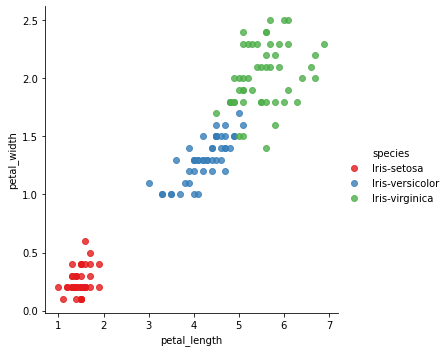

In [3]:
x = 'petal_length'
y = 'petal_width'
sns.lmplot(x=x, y=y, data=iris, hue='species',
           palette='Set1', fit_reg=False);

# Iris-Setosa

## 1 - create a binary classifier to detect this kind of Iris using LinearSVC from sklearn.

In [21]:
#traitement du fichier csv
df = pd.read_csv("iris_dataset.csv")
a = iris.loc[:, "petal_length"]
b = iris.loc[:, "petal_width"]
x = list(zip(a, b))
y = iris.loc[:, "species"]
iris.head()
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
#instanciation
model_set = LinearSVC(C=3.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#training
lsvc = model_set.fit( x_train, y_train)

#calcule de précision
print( model_set.score( x_test, y_test))

#Prédiction
longueur = 2
largeur = 0.2
prediction = model_set.predict( [[longueur, largeur]])

#affichage des résultats
print(prediction)

0.9333333333333333
['Iris-setosa']


## 2 - plot the decision boundaries of your model.

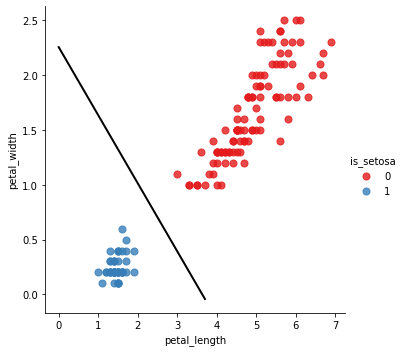

In [8]:
# Get the separating hyperplane
w = model_set.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3.7)
yy = a * xx - (model_set.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors

# Plot the hyperplane
sns.lmplot(x='petal_length',y='petal_width', data=iris, hue='is_setosa', palette='Set1', fit_reg=False, scatter_kws={"s": 50})
plt.plot(xx, yy, linewidth=2, color='black');

## 3 - display the performance indicators of your model : precision score, recall score, confusion matrix and ROC Curve

In [9]:
lsvc.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)


Score:  0.925


In [18]:
ypred = lsvc.predict(x_test)
cr = classification_report(y_test, ypred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.67      0.80         9

       accuracy                           0.90        30
      macro avg       0.92      0.89      0.89        30
   weighted avg       0.93      0.90      0.90        30



In [19]:
y_pred = model_set.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLOR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLOR','VIRGINICA'],)
cm_df

,SETOSA,VERSICOLOR,VIRGINICA
SETOSA,12,0,0
VERSICOLOR,0,9,0
VIRGINICA,0,3,6


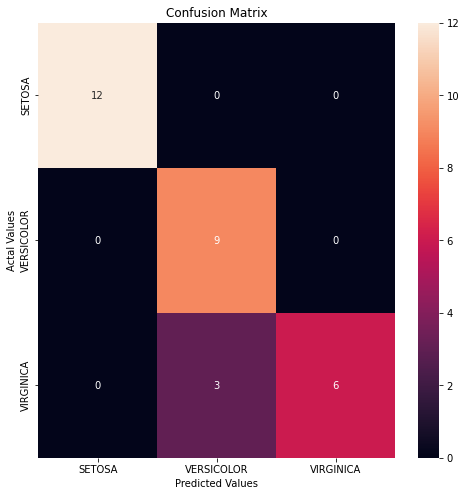

In [20]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 4 - use StandardScaler to standardize the dataset as a preprocessing step, do you have better scores ?

In [10]:
from sklearn.preprocessing import StandardScaler

scaled_features = iris.copy()
col_names = ['petal_length', 'petal_width']
features = iris[col_names]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features


,petal_length,petal_width,species,is_setosa,is_versicolor,is_virginica
0,-1.341272,-1.312977,Iris-setosa,1,0,0
1,-1.341272,-1.312977,Iris-setosa,1,0,0
2,-1.398138,-1.312977,Iris-setosa,1,0,0
3,-1.284407,-1.312977,Iris-setosa,1,0,0
4,-1.341272,-1.312977,Iris-setosa,1,0,0
...,...,...,...,...,...,...
145,0.819624,1.447956,Iris-virginica,0,0,1
146,0.705893,0.922064,Iris-virginica,0,0,1
147,0.819624,1.053537,Iris-virginica,0,0,1
148,0.933356,1.447956,Iris-virginica,0,0,1


In [11]:
#traitement du fichier csv
a = scaled_features.loc[:, "petal_length"]
b = scaled_features.loc[:, "petal_width"]
x = list(zip(a, b))
y = scaled_features.loc[:, "species"]
scaled_features.head()
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
#instanciation
model_setC = LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#training
lsvc2 = model_setC.fit( x_train, y_train)

lsvc2.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)

Score:  0.31666666666666665


# Iris-Versicolor

## 1 - create a binary classifier to detect this kind of Iris using LinearSVC from sklearn.

In [17]:
#traitement du fichier csv
df = pd.read_csv("iris_dataset.csv")
a = df.loc[:, "petal_length"]
b = df.loc[:, "petal_width"]
x = list(zip(a, b))
y = df.loc[:, "species"]
df.head()
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
#instanciation
model_SVC = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#training
lsvc = model_SVC.fit( x_train, y_train)

#calcule de précision
print( model_SVC.score( x_test, y_test))

#Prédiction
longueur = 10
largeur = 0.5
prediction = model_SVC.predict( [[longueur, largeur]])

#affichage des résultats
print(prediction)

0.9
['Iris-versicolor']


## 2 - plot the decision boundaries of your model.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


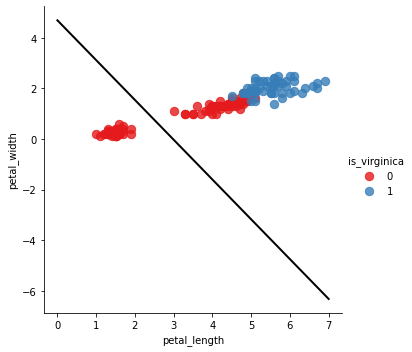

In [42]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf = clf.fit(x_train, y_train)
predictions = clf.predict(x_test)


# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 7)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
# Plot the hyperplane
sns.lmplot('petal_length', 'petal_width', data=iris, hue='is_virginica', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


## 3 - display the performance indicators of your model : precision score, recall score, confusion matrix and ROC Curve

In [55]:
lsvc.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)

Score:  0.8602352941176471

Score:  0.9583333333333334


In [56]:
ypred = lsvc.predict(x_test)
cr = classification_report(y_test, ypred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.62      0.77         8

       accuracy                           0.90        30
      macro avg       0.92      0.88      0.88        30
   weighted avg       0.92      0.90      0.89        30



In [57]:
y_pred = model_SVC.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,12,0,0
VERSICOLR,0,10,0
VIRGINICA,0,3,5


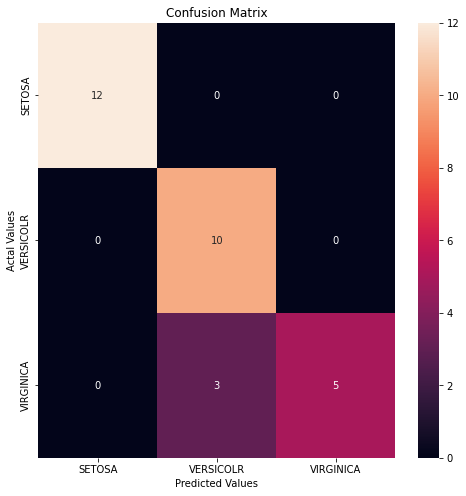

In [58]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Virginica

## 1 - create a binary classifier to detect this kind of Iris using LinearSVC from sklearn.

In [82]:
#traitement du fichier csv
df = pd.read_csv("iris_dataset.csv")
a = df.loc[:, "petal_length"]
b = df.loc[:, "petal_width"]
x = list(zip(a, b))
y = df.loc[:, "species"]
df.head()
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
#instanciation
model_SVC = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#training
lsvc = model_SVC.fit( x_train, y_train)

#calcule de précision
print( model_SVC.score( x_test, y_test))

#Prédiction
longueur = 2.5
largeur = 0.75
prediction = model_SVC.predict( [[longueur, largeur]])

#affichage des résultats
print(prediction)

0.9333333333333333
['Iris-setosa']


# 2 - plot the decision boundaries of your model.

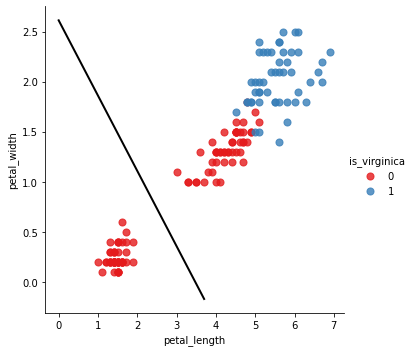

In [89]:
# Get the separating hyperplane
w = model_SVC.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3.7)
yy = a * xx - (model_SVC.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors

# Plot the hyperplane
sns.lmplot(x='petal_length',y='petal_width', data=iris, hue='is_virginica', palette='Set1', fit_reg=False, scatter_kws={"s": 50})
plt.plot(xx, yy, linewidth=2, color='black');

## 3 - display the performance indicators of your model : precision score, recall score, confusion matrix and ROC Curve

In [32]:
lsvc.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)

Score:  0.8602352941176471

Score:  1.0


In [86]:
ypred = lsvc.predict(x_test)
cr = classification_report(y_test, ypred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.95      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [87]:
y_pred = model_SVC.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,6,0,0
VERSICOLR,0,11,2
VIRGINICA,0,0,11


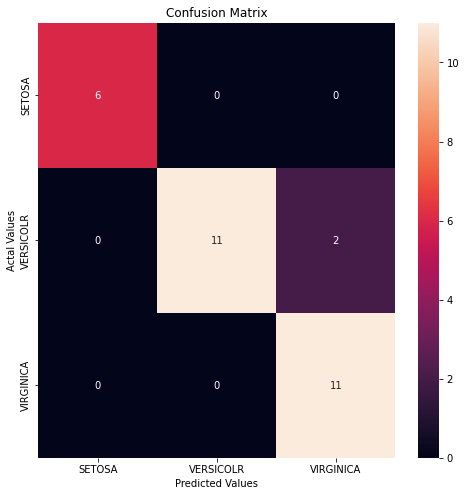

In [88]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()